# Data Preprocessing

## Gather all the data from csv

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import csv
import re
import requests 
import matplotlib.pyplot as plt # for plotting

Merge all the Twitter Data first

In [3]:
#read all the pull data in csv files
all_filenames = [i for i in glob.glob(".\data\his*.csv")]
print(all_filenames)

['.\\data\\his.csv', '.\\data\\historic1.csv', '.\\data\\historic1_01010314_#Moderna.csv', '.\\data\\historic1_01010314_#Modernavaccine.csv', '.\\data\\historic1_01010314_#pfizer.csv', '.\\data\\historic1_01010314_pfizervaccine.csv', '.\\data\\historic1_03150514_#Moderna.csv', '.\\data\\historic1_03150514_#Modernavaccine.csv', '.\\data\\historic1_03150514_#pfizer.csv', '.\\data\\historic1_03150514_pfizervaccine.csv', '.\\data\\historic1_05150714_#Moderna.csv', '.\\data\\historic1_05150714_#Modernavaccine.csv', '.\\data\\historic1_05150714_#pfizer.csv', '.\\data\\historic1_05150714_pfizervaccine.csv', '.\\data\\historic1_07151014_#Moderna.csv', '.\\data\\historic1_07151014_#Modernavaccine.csv', '.\\data\\historic1_07151014_#pfizer.csv', '.\\data\\historic1_07151014_pfizervaccine.csv', '.\\data\\historic1_1.csv', '.\\data\\historic1_10151214_#Moderna.csv', '.\\data\\historic1_10151214_#Modernavaccine.csv', '.\\data\\historic1_10151214_#pfizer.csv', '.\\data\\historic1_10151214_pfizervacc

In [5]:
#combine all the old tweets
combined_old = pd.concat([pd.read_csv(f,encoding='utf-8') for f in all_filenames],ignore_index=True)
#export to csv
combined_old.to_csv( ".\data\combined_old.csv", index=False, encoding='utf-8')
combined_old=pd.read_csv(".\data\combined_old.csv", encoding='utf-8')
#change the column name of the historical twitter data to match with the recent ones
combined_old.rename(columns={'created_at':'date','full_name':'location'},inplace=True)


In [23]:
#combined: the recent twitter data we gathered 
recent_tw=pd.read_csv("recent_tw.csv", encoding='utf-8')
all_tw=pd.concat([combined_old,recent_tw])
all_tw.head()

,date,text,location
0,09-12-2021,Everyone even if vaccinated should watch these...,"Pennsylvania, USA"
1,16-11-2021,@MemHospitalNH Kudos to this dedicated team! 🏆...,"New Hampshire, USA"
2,14-11-2021,"Mandate or no mandate, getting a #COVID19Vacci...","Pennsylvania, USA"
3,12-11-2021,https://t.co/ysXpCGuMra @BillGates @CDCgov #CO...,"Mississippi, USA"
4,10-11-2021,FREE #COVID19Vaccine clinic @DeckerPUSD on Su...,"California, USA"


In [11]:
all_tw['month'] = pd.DatetimeIndex(all_tw['date']).month
all_tw=all_tw.drop_duplicates()
combined=all_tw

## Clean the Data


- Remove @ symbol and url

- Remove the punctuation

- Transform to lowercase

- Split the words

- Remove stop words

- Remove short words

- Remove emojis

In [12]:
#Remove @ symbol and url
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

combined['formatted_text'] = np.vectorize(remove_pattern)(combined['text'], "@[\w]*") 
combined['formatted_text'] = combined['formatted_text'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\zheng\AppData\Local\Temp/ipykernel_26192/4120966670.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  combined['formatted_text'] = combined['formatted_text'].str.replace('http\S+|www.\S+', '', case=False)


In [13]:
#remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
combined['formatted_text'] = combined['formatted_text'] .apply(lambda s: deEmojify(s))


In [14]:
#remove the punctuation, then transform to lowercase and split the words
import string 
def remove_punctuation(sentence):
    """
    Remove punctuation from the input sentence.
    """
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)

combined['formatted_text'] =combined['formatted_text'] .apply(remove_punctuation)
combined['formatted_text'] =combined['formatted_text'] .str.lower()
combined['formatted_text'] =combined['formatted_text'] .str.split()

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stop_words(list_of_words):
    """
    Keep only words that are not in the list of 
    stop words
    """
    return [word for word in list_of_words if word not in stop]

combined['formatted_text'] = combined['formatted_text'].apply(remove_stop_words)

In [16]:
#remove short words
def remove_short_words(list_of_words):
    """
    Keep only words that are not in the list of 
    stop words
    """
    return [w for w in list_of_words if len(w)>3]

combined['formatted_text'] = combined['formatted_text'].apply(remove_short_words)
combined['formatted_text']

0       [everyone, even, vaccinated, watch, videos, sh...
1                [kudos, dedicated, team, covid19vaccine]
2       [mandate, mandate, getting, covid19vaccine, be...
3                      [covid19vaccine, bioweapon, china]
4       [free, covid19vaccine, clinic, sunday, novembe...
                              ...                        
5167    [probably, think, know, whole, covid19, visit,...
5168    [beyond, time, everyone, took, vaccine, based,...
5169    [pediatrician, parent, young, boys, markeita, ...
5170    [promotes, vaccine, boosters, whereas, mixandm...
5171    [remember, skipped, grandparents, line, covid1...
Name: formatted_text, Length: 6408, dtype: object

## Calculate polarity and subjectivity

In [17]:
from textblob import TextBlob
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def getSentimentTextBlob(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"
def get_tweet_sentiment(text):
  print(text)
  return text

In [18]:
combined['formatted_text']=combined['formatted_text'].apply(lambda x: get_tweet_sentiment(' '.join(x)))
combined['polarity']=combined['formatted_text'].apply(getPolarity)
combined['Subjectivity']=combined['formatted_text'].apply(getSubjectivity)
#How to hide this?

everyone even vaccinated watch videos share covid19vaccine
kudos dedicated team covid19vaccine
mandate mandate getting covid19vaccine best keep family safe enjoy holidays easier ever find vaccines philly
covid19vaccine bioweapon china
free covid19vaccine clinic sunday november deckermakeswaves proud2bepusd phillipsranch
thats oldest background picture happy today vaccineswork covid19vaccine
three disrupted elementary school years kids waiting patiently covid19vaccine today finally turn grateful beloved pediatrician went beyond vaccinate patients first could total superhero
amvaxadors aclamo aclamohealth covid19vaccine getvaccinated
take covid19vaccine safe effective approved
thankful able give receive appe students month organized successful covid19vaccine clinics week boosted vaccinessavelives ibelieveinscience medtwitter twitterx
good healthcareworkers dont want covid19vaccine business healthcare simple imagine stiil fighting polio healthcareworkers werent vaccinated polio political 

reminder little marco rubio tries mock decorated veteran following covid19 protocols jumped line make sure healthy covidvaccine elderly venerable retirerubio check instead
biden forcing inject food drug approved vaccine whos ready microchip next covidvaccine forcetheshot
bringing north country voices covidvaccine national stage
gold medal stupidity throw away silly masks discard needles useless vials covidvaccine free catch covid19 free spread freely amongst family friends unsuspecting strangers street
waiting superpowers kick hoping rogue xmen covidvaccine
isnt gonna sway antivaxxer covidvaccine point nothing illuminate selfishness unvaccinated slobs whore getting folk sick creating variants taking beds folk need surgery
vaccine science works back covid covidisnotover covidvaccine
vaccine american thing covidvaccine
mask covidvaccine
aside getting sick dying trustscience covidvaccine soon able kind prize super annoyed idiots getting rewarded idiots late party getvaccinated getvaccinat

savio beers president american academy pediatrics answers questions covid19 vaccine kids
latest foia request grandchildren able complete pfizer vaccine data year
pfizer biontech tests show received booster dose vaccine well protected
completely unacceptable
clear could theres scientific data
breaking report says needs years fully release pfizer covid19 vaccine data
breaking report says needs years fully release pfizer covid19 vaccine data worldwide life expecta
breaking report says needs years fully release pfizer covid19 vaccine data worldwide life expecta
breaking report says needs years fully release pfizer covid19 vaccine data
bnt162b2 vaccine booster mortality covid19 nejm
jennifer aniston says bullied provaccine stance labeled liberal vaxhole amid covid19
breaking report says needs years fully release pfizer covid19 vaccine data worldwide life expecta
breaking report says needs years fully release pfizer covid19 vaccine data worldwide life expecta
breaking report says needs years

In [19]:
combined['Sentiment']=combined['polarity'].apply(getSentimentTextBlob)
combined['Sentiment'].value_counts()

Neutral     3311
Positive    2255
Negative     842
Name: Sentiment, dtype: int64

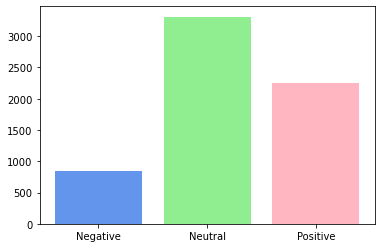

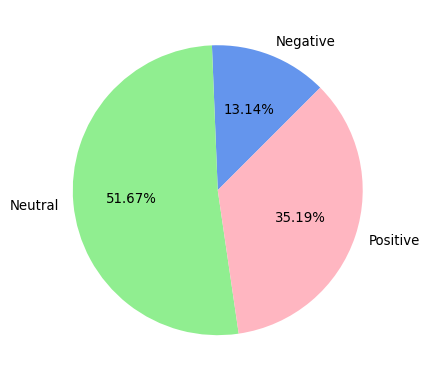

In [20]:
senti_bar = combined.groupby(['Sentiment']).size().reset_index().rename(columns={0:'total_tweets'})
barplot=plt.bar(x = 'Sentiment', height = 'total_tweets',data = senti_bar,
        color=["cornflowerblue", "lightgreen", "lightpink"], 
       )
my_dpi=96
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
pieplot=plt.pie(x='total_tweets',data = senti_bar,
        labels=['Negative','Neutral','Positive'],
        colors=["cornflowerblue", "lightgreen", "lightpink"], 
        autopct='%.2f%%',
        startangle=45,
       )
basic_visualization=barplot+pieplot

In [21]:
#save the result
combined.to_csv( ".\data\cleaned_data.csv", index=False, encoding='utf-8')